#### 多维数组

In [ ]:
import numpy as np

data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data1 = data * 10
data + data1

array([[ 16.5,  -1.1,  33. ],
       [  0. , -33. ,  71.5]])

In [ ]:
print(data.shape)  #输出数据维度
data.dtype  #输出数据类型

(2, 3)


dtype('float64')

In [ ]:
str_arr = np.array([['a', 'b', 'c'], ['d', 'e', 'f']])
str_arr.dtype

dtype('<U1')

##### 创建nd array

In [ ]:
list1 = [1, 2, 3, 4]
arr1 = np.array(list1)
print(arr1)
list2 = [[1, 2], [3, 4]]
arr2 = np.array(list2)
print(arr2.ndim)  # 输出维度
arr2

[1 2 3 4]
2


array([[1, 2],
       [3, 4]])

###### zeros

In [ ]:
zero = np.zeros((2, 3))
zero

array([[0., 0., 0.],
       [0., 0., 0.]])

###### ones

In [ ]:
one = np.ones((2, 2), dtype="int64")
one

array([[1, 1],
       [1, 1]], dtype=int64)

##### arange


In [ ]:
a_range = np.arange(8)
a_range

array([0, 1, 2, 3, 4, 5, 6, 7])

##### 通过索引数组对二维数组进行复杂访问

In [ ]:
arr35 = np.arange(32).reshape((8, 4))
arr35

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
arr35[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [ ]:
arr35[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

##### 转置矩阵

In [ ]:
arr_raw = np.arange(15).reshape((3, 5))
arr_raw

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
arr_raw.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [ ]:
# np.dot(arr_raw.T,arr_raw)
arr_raw.T @ arr_raw

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

#### 生成伪随机数

In [ ]:
np.random.standard_normal(size=(4, 4))

array([[ 1.81097619, -0.50264176,  0.612836  ,  0.23617464],
       [-1.0609996 , -0.24150876,  0.96673137,  0.04342907],
       [-0.65621157, -0.64025261, -0.82799061,  2.22506894],
       [-1.08040483,  1.21099353, -0.86180449, -0.08998153]])

###### 自定义生成的初始状态

In [ ]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
data

array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

###### 通用函数 产生多个矩阵

In [ ]:
arr111 = rng.standard_normal(7) * 5
arr111

array([ 4.51099137, -2.33476587, -0.30344759,  3.94422172, -6.28334067,
        2.87928757,  6.99489497])

In [ ]:
remainder, whole_part = np.modf(arr111)
remainder

array([ 0.51099137, -0.33476587, -0.30344759,  0.94422172, -0.28334067,
        0.87928757,  0.99489497])

In [ ]:
whole_part

array([ 4., -2., -0.,  3., -6.,  2.,  6.])

In [ ]:
arr_agg = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]], dtype="int32")
arr_agg

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [ ]:
np.average(arr_agg, axis=1)

array([1., 2., 3.])

#### 随机步数


##### python原生实现

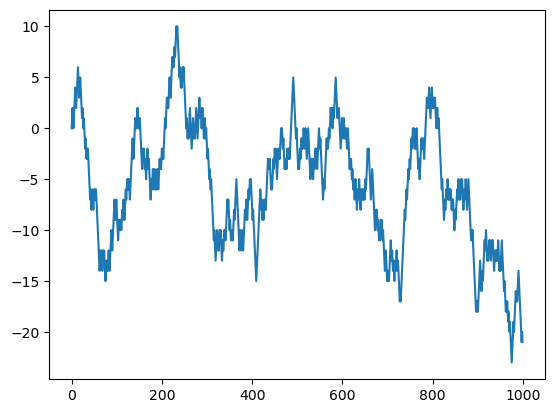

In [ ]:
#! blockstart
import random

position = 0
walk = [position]
states = []
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    states.append(step)
    walk.append(position)
#! blockend
import matplotlib.pyplot as plt

plt.plot(walk[:1000], data=states[:1000])

##### numpy实现

min -8
max 50
在任何一个方向上达到10，走过的最少步数 155


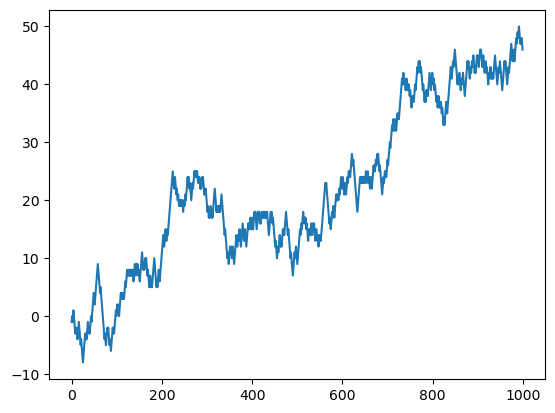

In [ ]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk1 = steps.cumsum()
print("min", walk1.min())
print("max", walk1.max())
print("在任何一个方向上达到10，走过的最少步数", (np.abs(walk1) >= 10).argmax())
plt.plot(walk1[:1000])

In [ ]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps))  # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
print("最大步数", walks.max())
print("最小步数", walks.min())
hits30 = (np.abs(walks) >= 30).any(axis=1)
print(hits30)
print("达到30步的轮数", hits30.sum())
cost_steps = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
print("到达30步的时间数组", cost_steps)
print("平均到达30步的时间", cost_steps.mean())

最大步数 124
最小步数 -111
[False False  True ...  True  True  True]
达到30步的轮数 3407
到达30步的时间数组 [203 759 169 ... 389 709 459]
平均到达30步的时间 498.0214264749046


In [ ]:
# 测试通过bool索引对二维数组访问
arr1 = np.array([False, False, True])
arr2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2[arr1]

array([[7, 8, 9]])